In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pathlib import Path


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
file_path= Path("neo.csv")

In [3]:
nasa_df = pd.read_csv(file_path)
nasa_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
nasa_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [5]:
nasa_df = nasa_df.drop(columns=["orbiting_body", "sentry_object"])

In [6]:
nasa_df.drop_duplicates()
nasa_df = nasa_df.sample(n=250)
nasa_df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
21046,3249785,(2004 QB),0.291444,0.651688,108415.692680,6.239065e+07,19.80,True
90087,54137454,(2021 GQ10),0.012722,0.028447,26687.135031,2.660221e+07,26.60,False
83944,54075545,(2020 UY1),0.016771,0.037501,31499.348787,6.135702e+06,26.00,False
7548,3601299,(2012 EL8),0.005815,0.013003,17826.877220,4.612890e+07,28.30,False
77563,54075312,(2020 UN1),0.022108,0.049436,49771.618724,5.536949e+07,25.40,False
...,...,...,...,...,...,...,...,...
43055,54103603,(2020 YC5),0.127220,0.284472,59933.731573,3.352961e+07,21.60,False
60403,3666681,(2014 FK38),0.024241,0.054205,28680.348425,3.962524e+07,25.20,False
53003,2424482,424482 (2008 DG5),0.308003,0.688716,42653.926658,2.882118e+07,19.68,True
85955,3759245,(2016 RT17),0.052306,0.116961,32512.617122,2.530631e+07,23.53,False


In [7]:
test_graph_df = nasa_df[['hazardous','miss_distance']]
test_graph_df = test_graph_df.set_index("hazardous")


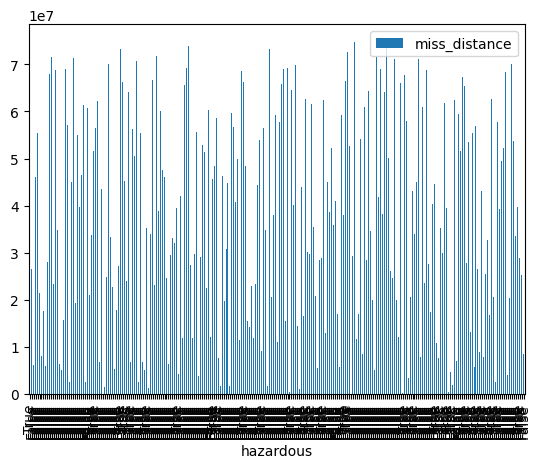

<Figure size 640x480 with 0 Axes>

In [8]:
test_graph_df = test_graph_df.plot(kind='bar')
plt.show()
plt.tight_layout()

In [9]:
nasa_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2.500000e+02,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,1.318916e+07,0.122268,0.273400,48873.390690,3.693129e+07,23.182184
std,2.000294e+07,0.160633,0.359185,27677.589635,2.257791e+07,2.689230
min,2.033342e+06,0.001756,0.003927,7410.569999,9.646148e+04,16.760000
25%,3.427459e+06,0.024241,0.054205,28648.894866,1.710251e+07,21.000000
50%,3.754619e+06,0.060891,0.136157,44067.252365,3.689370e+07,23.200000
75%,3.843695e+06,0.167708,0.375008,62734.916620,5.699843e+07,25.200000
max,5.427130e+07,1.181830,2.642652,150704.440078,7.479146e+07,30.900000


In [10]:
diameter_min_bins = [0, 0.01, 0.05, 0.10, 0.50, 1.0, 1.25, 1.5]

diameter_min_group_labels =  ["0 to 0.01","0.02 to 0.05", "0.06 to 0.10", "0.11 to 0.50", "0.51 to 1.0", 
                              "1.01 to 1.25", "1.26 to 1.5"]

In [11]:
nasa_df["est_diameter_min"] = pd.cut(nasa_df["est_diameter_min"], diameter_min_bins, labels=diameter_min_group_labels)
nasa_df.head()


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
21046,3249785,(2004 QB),0.11 to 0.50,0.651688,108415.692680,6.239065e+07,19.8,True
90087,54137454,(2021 GQ10),0.02 to 0.05,0.028447,26687.135031,2.660221e+07,26.6,False
83944,54075545,(2020 UY1),0.02 to 0.05,0.037501,31499.348787,6.135702e+06,26.0,False
7548,3601299,(2012 EL8),0 to 0.01,0.013003,17826.877220,4.612890e+07,28.3,False
77563,54075312,(2020 UN1),0.02 to 0.05,0.049436,49771.618724,5.536949e+07,25.4,False


In [30]:
nasa_df.dtypes

id                      int64
name                   object
est_diameter_min       object
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

In [16]:
min_diameter_graph = nasa_df[['est_diameter_min']]
min_diameter_graph = min_diameter_graph.set_index("est_diameter_min")

min_diameter_graph = min_diameter_graph.plot(kind='bar')
plt.show()
#plt.tight_layout()


TypeError: no numeric data to plot

In [22]:
hazardous_asteroids_df= nasa_df.loc[nasa_df['hazardous']]
hazardous_asteroids_df 


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
21046,3249785,(2004 QB),0.11 to 0.50,0.651688,108415.692680,6.239065e+07,19.80,True
53835,3843371,(2019 OR1),0.11 to 0.50,0.411188,78002.070410,5.640003e+07,20.80,True
74185,3878564,(2019 TP1),0.11 to 0.50,0.358129,48586.520097,7.319791e+07,21.10,True
35522,2357622,357622 (2005 EY95),0.11 to 0.50,0.508206,36111.190390,4.523820e+07,20.34,True
24364,2035107,35107 (1991 VH),1.01 to 1.25,2.642652,28214.997129,6.846725e+06,16.76,True
52132,2503861,503861 (1998 WZ1),0.11 to 0.50,0.639794,57600.119378,3.529066e+07,19.84,True
13468,3279740,(2005 LX36),0.11 to 0.50,0.411188,82911.024905,4.182007e+06,20.80,True
21779,2033342,33342 (1998 WT24),0.51 to 1.0,1.479245,70476.366594,4.840334e+07,18.02,True
61395,2477465,477465 (2009 XZ1),0.11 to 0.50,0.274183,55017.157765,7.596994e+06,21.68,True
30170,2455184,455184 (2000 ED14),0.11 to 0.50,0.337318,115921.039987,6.619158e+07,21.23,True


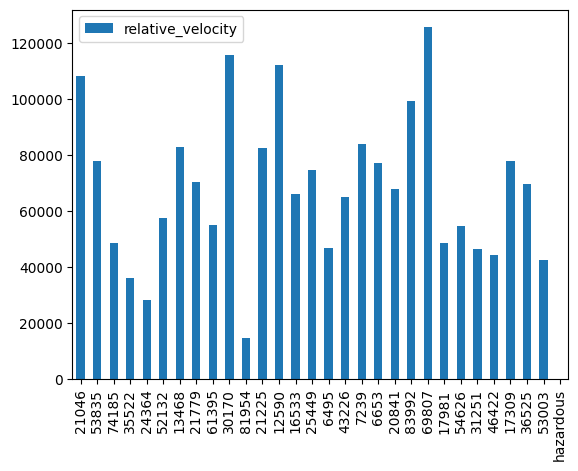

In [27]:
hazardous_graph = hazardous_asteroids_df[['hazardous','relative_velocity']]
hazardous_graph.plot(kind='bar')
plt.show()

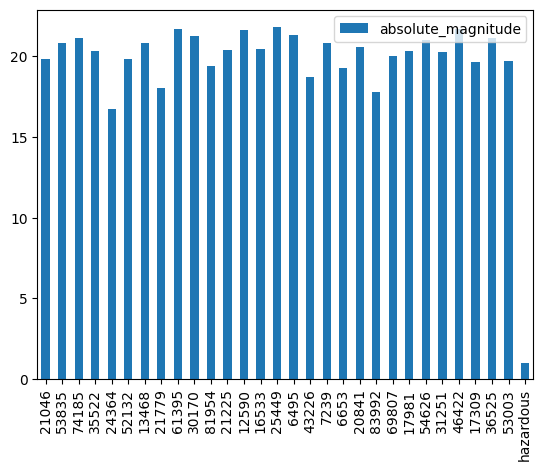

In [28]:
hazardous_graph = hazardous_asteroids_df[['hazardous','absolute_magnitude']]
hazardous_graph.plot(kind='bar')
plt.show()